In [ ]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [ ]:
!pip install eleanor

In [ ]:
!pip install astropy

In [ ]:
import eleanor

In [ ]:
#with name
star = eleanor.Source(name='MASCARA-2', sector=14)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 14...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 14 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
Found TIC 69679391 (Gaia 2033123654092592384), with TESS magnitude 7.55216, RA 294.66139666666663, and Dec 31.219226388888888


In [ ]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')

100%|██████████| 1241/1241 [00:17<00:00, 70.60it/s]


# 1. Light Curve

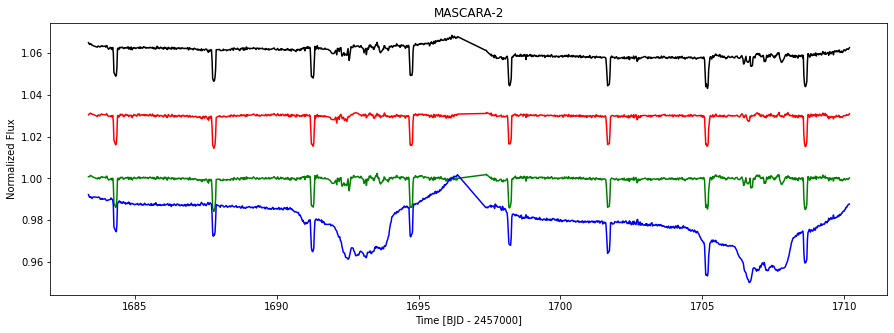

In [ ]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('MASCARA-2');


# 2. TPF

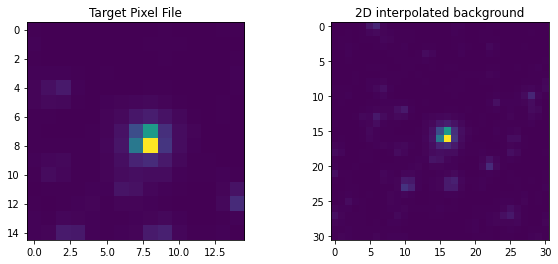

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

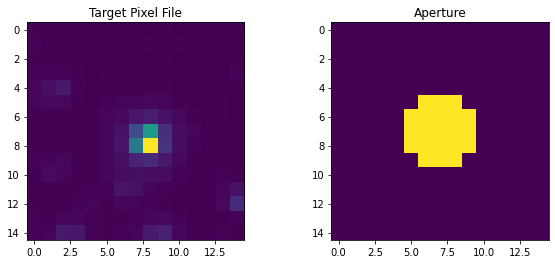

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.aperture)
ax2.set_title('Aperture');

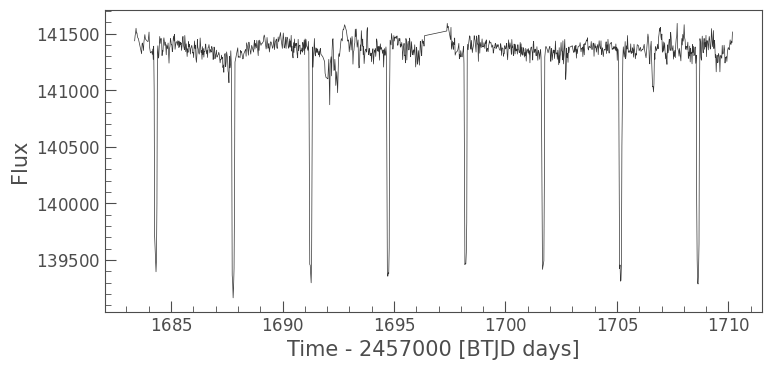

In [ ]:
lk = data.to_lightkurve()
lk.plot()